In [9]:
%matplotlib inline
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as pl

#Change default font size so you don't need a magnifying glass
matplotlib.rc('font', **{'size'   : 12})

Import the CEvNS module

In [10]:
import CEvNS
#help(CEvNS.xsec_CEvNS)

We'll consider a model with a new vector mediator $Z'$, with Lagrangian,

$\mathcal{L} \supset Z_\mu' \left( g_\nu^V \overline{\nu}_L \gamma^\mu  \nu_L + g_q^V \overline{q} \gamma^\mu q \right)$

plus some other terms (from gauge-invariance) which we neglect right now.

We'll also include the contribution to $\nu-N$ scattering from a neutrino magnetic moment $\mu_\nu$.

### Differential Cross Section

Calculate and plot the differential cross-section for a fixed neutrino energy (3 MeV) and the specific model above:

Max. Ge recoil energy (E_nu = 3 MeV):  0.26468447405  keV


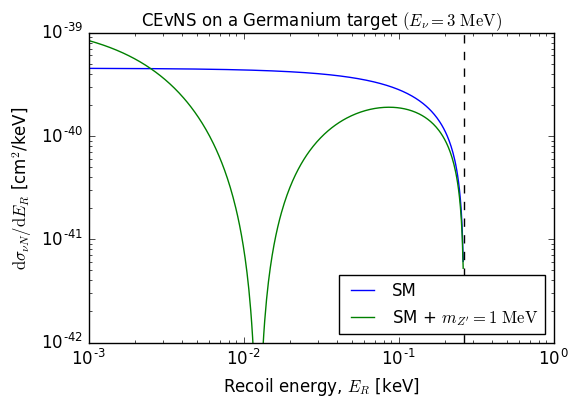

In [11]:
#Specify a single neutrino energy
E_nu = 3 #MeV

#Specify a nucleus
A_Ge = 73
Z_Ge = 32

#Calculate differential xsec
E_R = np.logspace(-3,0,500)
dsigdE = CEvNS.xsec_CEvNS(E_R, E_nu, A_Ge, Z_Ge)

#Specify New Physics parameters
m_med = 1.0 #Mediator mass, 1 MeV
gsq = (2e-6)**2 #(g^V_q)*(g^L_nu)

#Calculate differential xsec including New Physics
dsigdE_NP = CEvNS.xsec_CEvNS(E_R, E_nu, A_Ge, Z_Ge, \
                             gsq, m_med)

#Maximum recoil energy
Emax = CEvNS.ERmax(E_nu, A_Ge)
print "Max. Ge recoil energy (E_nu = 3 MeV): ", Emax, " keV"

#Do some plotting 
pl.figure()
pl.loglog(E_R, dsigdE, label="SM")
pl.loglog(E_R, dsigdE_NP, label=r"SM + $m_{Z'} = 1\,\, \mathrm{MeV}$")

pl.axvline(Emax, color='k', linestyle='--')

pl.ylim(1e-42, 1e-39)

pl.legend(fontsize=12.0, loc="best")

pl.title(r"CEvNS on a Germanium target $(E_\nu = 3 \,\,\mathrm{MeV})$", fontsize=12)
pl.xlabel(r"Recoil energy, $E_R$ [keV]")
pl.ylabel(r"$\mathrm{d}\sigma_{\nu N}/\mathrm{d}E_R$ [cm$^2$/keV]")
pl.show()


### Recoil Rate

Calculate the recoil rate in a Germanium target, assuming a neutrino flux from the Chooz reactor.

First, let's load the neutrino flux:

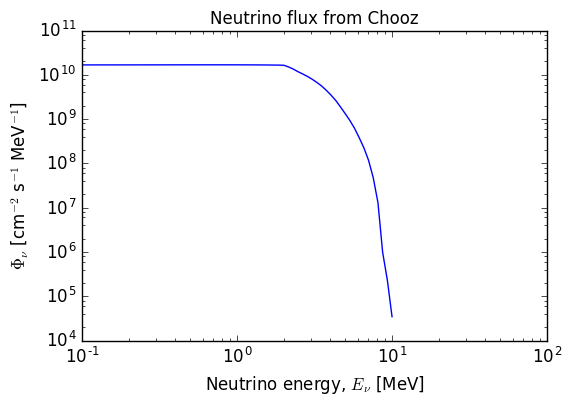

In [12]:
#Initialise neutrino_flux interpolation function
CEvNS.loadNeutrinoFlux()

#Plot neutrino flux
E_nu = np.logspace(-1, 2,100)

pl.figure()
pl.loglog(E_nu, CEvNS.neutrino_flux(E_nu))

pl.title(r"Neutrino flux from Chooz", fontsize=12)
pl.xlabel(r"Neutrino energy, $E_\nu$ [MeV]")
pl.ylabel(r"$\Phi_\nu$ [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]")
pl.show()

Now we calculate (and plot) the recoil rate:

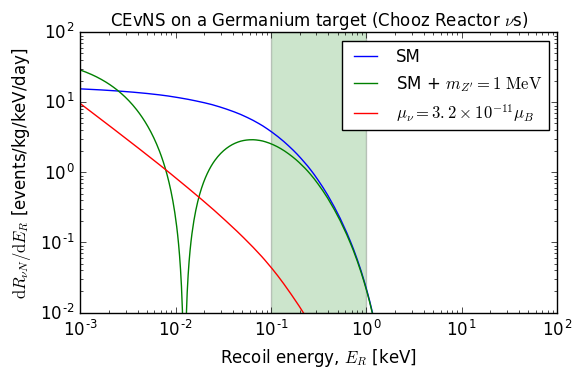

In [13]:
#Specify a nucleus
A_Ge = 73
Z_Ge = 32

#Calculate differential rate
E_R = np.logspace(-3,2,500)

#Vectorize the function differentialRate
diffRate_CEvNS = np.vectorize(CEvNS.differentialRate_CEvNS) #Vector exchange
diffRate_mag = np.vectorize(CEvNS.differentialRate_magnetic)   #Magnetic dipole

dRdE = diffRate_CEvNS(E_R, A_Ge, Z_Ge)

#Specify New Physics parameters
m_med = 1.0 #Mediator mass, 1 MeV
gsq = (2e-6)**2 #(g^V_q)*(g^L_nu)
mu_nu = 3.2e-11 #Neutrino magnetic moment in units of mu_B

#Calculate differential rate including New Physics
dRdE_NP = diffRate_CEvNS(E_R, A_Ge, Z_Ge, gsq, m_med)
dRdE_mag = diffRate_mag(E_R, A_Ge, Z_Ge, mu_nu)


#Do some plotting
pl.figure()

pl.fill_between(np.linspace(0.1,1), 1e-2, 1e2, alpha=0.2, facecolor='green')

pl.loglog(E_R, dRdE,label="SM")
pl.loglog(E_R, dRdE_NP, label=r"SM + $m_{Z'} = 1\,\, \mathrm{MeV}$")
pl.loglog(E_R, dRdE_mag, label=r"$\mu_\nu = 3.2\times10^{-11} \mu_B$")

pl.ylim(1e-2, 1e2)

pl.legend(fontsize=12.0, loc="best")

pl.title(r"CEvNS on a Germanium target (Chooz Reactor $\nu$s)", fontsize=12)
pl.xlabel(r"Recoil energy, $E_R$ [keV]")
pl.ylabel(r"$\mathrm{d}R_{\nu N}/\mathrm{d}E_R$ [events/kg/keV/day]")
pl.tight_layout()
pl.savefig("CEvNS_rate.pdf")

pl.show()